importing Jupyter notebook from i_creation_environnement.ipynb


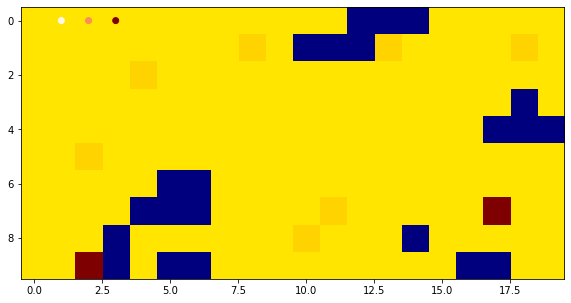

importing Jupyter notebook from iii_Temporal_Differences.ipynb
importing Jupyter notebook from h_plotting.ipynb


In [1]:
import import_ipynb
import i_creation_environnement
import iii_Temporal_Differences
import matplotlib.pyplot as plt

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
import h_plotting

matplotlib.style.use('ggplot')
import time

# Be CAREUL : long running time : env 30min

### Question : What is on average the best epsilon ? 
#### -> 10 iterations for each epsilon to answer
env 30 min 12:54

In [2]:
epsilons = [0.05, 0.1, 0.15, 0.2]
num_epi = 1000

env = i_creation_environnement.AugmentedGridworldEnv()

Q_stats = []
SARSA_stats = []

n_retry = 5

### WITH Q_LEARNING

In [3]:
for (i,epsi) in enumerate(epsilons) :
    Q_stats.append([])
    print("Epsilon : ", epsi)
    for j in range(n_retry):
        Q_stats[i].append(iii_Temporal_Differences.Q_learning(env, num_episodes = num_epi, epsilon = epsi)[1])

Epsilon :  0.05
Episode 1000/1000.Epsilon :  0.1
Episode 1000/1000.Epsilon :  0.15
Episode 1000/1000.Epsilon :  0.2
Episode 1000/1000.

#### Single trajectory

(10, 35)

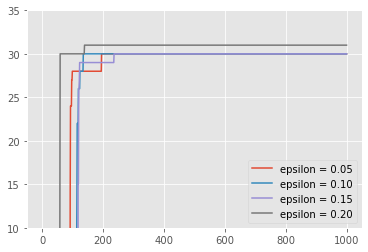

In [13]:
for i in range(len(epsilons)):
    plt.plot(iii_Temporal_Differences.cummax(Q_stats[i][0].episode_rewards), label = 'epsilon = %.2f'%epsilons[i])
plt.legend()
plt.ylim((10,35))

#### Mean over n_retry

(10, 55)

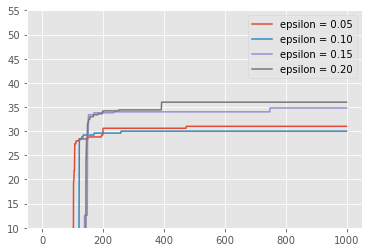

In [5]:
for i in range(len(epsilons)):
    a = np.mean(np.array([iii_Temporal_Differences.cummax(Q_stats[i][j].episode_rewards) for j in range(n_retry)]), axis=0)
    plt.plot(a, label = 'epsilon = %.2f'%epsilons[i])
plt.legend()
plt.ylim((10,55))

##### epsilon = 0.15 is the best ! 

### With SARSA

In [6]:
for (i,epsi) in enumerate(epsilons) :
    SARSA_stats.append([])
    print("Epsilon : ", epsi)
    for j in range(n_retry):
        SARSA_stats[i].append(iii_Temporal_Differences.SARSA(env, num_episodes = num_epi, epsilon = epsi)[1])

Epsilon :  0.05
Episode 1000/1000.Epsilon :  0.1
Episode 1000/1000.Epsilon :  0.15
Episode 1000/1000.Epsilon :  0.2
Episode 1000/1000.

#### Single trajectory

(35, 45)

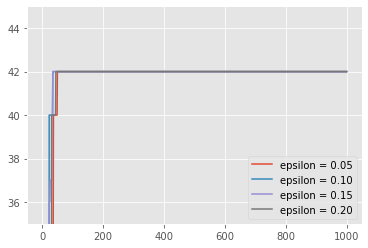

In [16]:
for i in range(len(epsilons)):
    plt.plot(iii_Temporal_Differences.cummax(SARSA_stats[i][0].episode_rewards), label = 'epsilon = %.2f'%epsilons[i])
plt.legend()
plt.ylim((35,45))

#### Mean over n_retry

(30, 45)

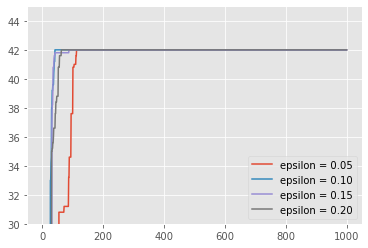

In [10]:
for i in range(len(epsilons)):
    a = np.mean(np.array([iii_Temporal_Differences.cummax(SARSA_stats[i][j].episode_rewards) for j in range(n_retry)]), axis= 0)
    plt.plot(a, label = 'epsilon = %.2f'%epsilons[i])
plt.legend()
plt.ylim((30,45))